# Community detection

<font size="4">which journal(s) initiate(s) chains of circulations outside the AG community</font>

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg
import plotly.express as px
from IPython.display import HTML, Image

In [3]:
endpoint = "http://localhost:3030/VCHuman/sparql"

<font size="4">To understand the impact of the AG in other types of publications/communities, we search for clusters that have both images from AG journals as well as images NOT from AG journals</font>

In [4]:
q ="""

PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX aat: <http://vocab.getty.edu/aat/>


SELECT DISTINCT ?cluster WHERE {

  
	VALUES ?avantgarde { <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> } .
	

		?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
		?image crm:P128i_is_carried_by ?issue . 
		?issue crm:P2_has_type ?avantgarde;
				rdfs:label ?AGJournal.  


	
		?cluster crm:P148_has_component ?image1 . 
		?image1 crm:P128i_is_carried_by ?issue1 . 
		?issue1 crm:P2_has_type ?type ;
				rdfs:label ?notAGJournal .
		?type rdfs:label ?JournalTypeLabel .

		FILTER (contains(str(?type), "https://lod.unige.ch/vc/type/"))
		FILTER (?type != ?avantgarde)

# Trashy cluster not useful for the analysis

	FILTER NOT EXISTS {
                         VALUES ?trash {


<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000140031d34e7f32f8fd1bd1734060214c3ad24b96e367e6c7ac7b2af6e527cc8c34e8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000f00f2517854b489d2bdd53b690c5ff830c0c9f1aad4b60a27941f7781267ef1cf6d>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000500e18f2dac9c45156004ab5cb9939ea646d784722ff6c1ffac5bc37ca091252e43>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000005009220cc1b213b05cab3efc43f0e4561a36e216780fd363dc3ead1f01368b33892>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000040077e6a6c83e14343f6f6640aeeda400ff79c66e15558495f38a570229ad9088da>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000004001433a294563676e3499ab3f3877fb7c388dff9a5b91fc17a69d60ea565814536>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300c7466ff7352ae34a7341e0bb573f1537bba5788f9698df593f00176adf8ed978>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300b2355781a9e3f1dbdb79ffa77e67ad7da85ddddc1b790f4aefed59d2e45ee6a7>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030063404a0b0f25c4bc11f2589dcc74b4b1e0989ce265572a46d13a6f91eb6a9f1e>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030039ac3a0cdc635027c14d500278366e1e2d767267aa062f58c359d0841ac6f37d>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300368959fdd010d08813b6d7d34ab791758478818f879759c1f3c6455c1983d25a>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000003002d62f3a250c7310a2440b06f3de7c606651e206c3579454081a24a89d1878351>                         
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000300019e9b2c78d92b6f56d6d01b99fc4c722d55e9e9872dda2e634f2b0cdd02cfb8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200e0b8e0d04e36ee62cb79253ae7fcc151fa922fe902ab36885f4abcc47fdcca4e>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000002006b69c25c491d4e7aca5e62f66747d03cb47abb810859c34e66df831c293fa8a8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000020061273c01a5333060afef4bfd7f379cd01afb5eeb849390d3ea85b2479d84a08f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000002002cb36192f01631ce9d01048c27246acbb60f2fde7d2d4bfdfed1804c31b4bdb9>                         
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000020021801a7508f0295ee7be2a86ea9763bfb0078aef44c89552351caea2aea3a3ea>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000600c6af7d32a5d172ca59bb1997a4ef6e983d60d06f5b3a3755fbc65ae1957ce23c>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000700fb49c1f48487902b4437e16cc2d78b89e3a98f52c8f65c0e4eedd85d80e217b1>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000700fb79995772c00bb4d73d2b5e91c91d7781e7268c7c0b6a2606e4c01cfcf66ac5>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000090015ff635e61946bf01b675ffc6877c07c6e7725f68a3839a2f852f62ec67995dc>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00a7abfe7063f803a5dcd90cc8d54008e7a3e69f07e487a0fd40b1b279bc79eef8>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00feca4edc94d98d05c7a13833c7564e324cd20be9051832da916e9d70ae07ad1f>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a0065d77d414af0128714e423067fdd3a73230699c7194f079ace217c302713f314>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000e00aa775ab9acbab969b79714d2d78737b258410af160aec663e8c3e407a849e288>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000180098a1d3bd96c00a6c0f612ed33db5e18664e5e44e29e899c739cb46efb5c9359b>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001800c35c11877c73151184ef51a631b37e6e0f026c72ba48b32e4789422e11c09fbf>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001b00906fbaf5aa338463ada02b2778d69154a89525e13026eadc19cd82862a95cd69>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002200a85e3117d932d5ef5a9c5d178e43a8d6dc07bde665a426d313568bfa5ea3a9f9>
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002500745277a76e3c39dfaee431f9ac5c0b4520e1855440cddfdec90e7d5882af5063> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00003c0079fca5aa32f21f894f60a5dd25ba17e720c469af10a6e4b1df453de30fe93e17> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00003d00c899a5073ac5851b4552ef41cddb8a59959cbaff5aede5cbd5aa624f13984e04> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001e002b2b66d8341fe8685ad3b9df6bc17590236bead713432c79bc2914b23e888c73> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000490021648c6fcce403be16b80d654186ffafd7635e4e0906a65516aff956179a61d3> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000030040d2720fb2fd94a38df5dc5b0d55e14309962e6c764e23a54a819816cdfe9c20> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000015004c44ed7f0e7150811be78d4b930ef72322476f4d9cadcf1f73b08117bae435a1> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00026200b3d151e5c855c651b2a0bea2c9116be1a5e5b7141bacc846b12d3708338ff615> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000ca00a432dfdd48c6534088f51065c6f2983133e467314d5d6a4560ae5ea16de6f359> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000e8009061dc5b29fb17872c9c13ac1a64fe42e8b94af2481e59886f28d0156fde0ceb> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00008a005e931cc1f1dc0dc0f82d3ee457c5b642600420ae9313b50ad6c0d75b41b8f1c0> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0001bd00a370039869e9e1bb229cd73ddc231b51110e135de82d755ef72e3b367a5411e9> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000109002f020235176a28018a0944ed84b4b7ddbed8737474caaa5c0b54922a4cd6073c> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00024100820c145c252454de492f79784d2c1df4b3a13d9eabf0179f0e0305b516a764ba> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ec00036e6aa8355e0f69196bf6006defd506c93e04722b54cf7831c66c3c3b8dbb05> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000200f89ef4fb7b639ce5e811ec9ec425c3da3b92dd5edb5d9e64fbf8d010f9d96d71> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000040066b73cf2a0b0742a0aceecc4dd1724b52dc7afbdc4b48432ee3f0336124798aa> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001200bed2a9ade1689744b661b58c1d93bcd442cbeafcf07b6460d0df1b33d65f5b86> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000022005d01a84e38421213b8816fd78e4aef0890445f65f81de2ee1459980a6335942a> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001600fe63944181de71b69fc3900867dc30611de913a214c5d42ac2e7ce3dd7cff99f> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000012009d66187e47b439dd2c2e6668dd9945209f40685c7039c56c563a4aa9bbfa9718> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000d0069b0d3bd802ae948c1f53b96391afeb46fcd505e999cb56cd37406508e4ef418> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b002057ee6db2a8ea72c04e36379e7b035a4d2911a1155b5652230551866825ab90> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000b0003d9d58d012451307b2ef5fbd75af31eec0c5f1afcdefb10b4ab8fbc38d15615> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000a00609f4e0b53f5b2ca7afaea13c7a3ba187b05ae3bdd1108598e5226a7aaf18ded> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000008005b033c554cfd743ed238cd05b35f46fe7de56720622971b00aecaf985896fe4a> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00000600d4e85eaf39fb676e999b8d2466a4455d48d70791ff2d4dd1cc4653c248264df3> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002a00a60bf43cf1fb052165221ee1727e977b2ecf99f820cbbd426d12c6aa6a37d9e4> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000310098549f748176d2f4efedf76773dca2aafeaf8db5f746daf37a50dd3d0819dbb3> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003d500d8362a66c04fe8273b00d9470929fd918a6dc6c4395f060e0c5e270f12f54f5c> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0003ff00a6da95a6b61b8c47220d9839b7b4b6afe26daad02ee0c0c291c40ad1bb0bec90> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000c9000f961bd877cdc346bd51b76a74b698924ae6960e3bbfa0986e7aea7da730930c> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0000d000ecf8a0329d2530d3eb601e077c0e5c298db100b8316c0af9232e41e8a7e8e4ef> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000403008f37a6852f6339eefe0e74225b20553b5d641b32015b15d40ca4d216a540ae2f> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002400d7b4ea535865b256e1c13f0d6505182ead425183c8f919bfa3309aab1dae43dc> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f00c18ad27c34a66610ece997934ce4bc1aa5fbcdad562e58a52ab86792352bfb9c> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00002b000918272590bc01401e6367c6448a222445fe13cabec0a2a38a7b38e598cea622> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000057008d59ea30b6175a9c5c32ebf3caa2c27cce0d569fd3b2a899ebf0107086c3a197> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/000028007bf1c23529418f9fba6de2955caa8fa4e1572632151c41a9f1b20c1c5a45a1c5> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00005a009d47a1932fcbbe7ff04ac3017fa6d167f06fe3287477d6c1cedae50451cd67dc> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001f0087307813ef1d16a6def5d96b8b6550a707da4fd6702aa64d8425b29e6826f049> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c0000968f38146238bab2f376c40b0fca62e734f151a85e2ecce4981e0050eb57a0> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d00ffc088f4f254a86d70e0a3495bbf5f288b1373e96c6875d487cd1b14076e2702> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001d000d01d183fa765191f6028c4b69a7e1c9c9ed1d9a3ae14bb9a4731b5172f4b337> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00001c002016002f400721bfa0a32f16e887e64cc4e092cd626a7fb7c426545e0757e7f1> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/0002910088db3f58b1c573c281f266c695c21d421c9337abca57d4a51440e13a2f9c5893> 
<https://visualcontagions.unige.ch/explore/duplicates/clusters/00028200ce1d42e579bb46d53b1b038b5f23bf88a8057f5d5cb9806d9c87dee28477ecc4>
} .
    ?cluster crm:P1_is_identified_by ?trash . } 

}



"""

In [5]:
df = sparql_dataframe.get(endpoint, q)

In [6]:
df

,cluster
0,https://lod.unige.ch/vc/cluster/human/353
1,https://lod.unige.ch/vc/cluster/human/352
2,https://lod.unige.ch/vc/cluster/human/376
3,https://lod.unige.ch/vc/cluster/human/210
4,https://lod.unige.ch/vc/cluster/human/331
...,...
73,https://lod.unige.ch/vc/cluster/human/366
74,https://lod.unige.ch/vc/cluster/human/402
75,https://lod.unige.ch/vc/cluster/human/57
76,https://lod.unige.ch/vc/cluster/human/335


In [7]:
df['cluster'] = '<' + df['cluster'].astype(str)
df['cluster'] = df['cluster'].astype(str) +  '>' 
cluster = df["cluster"].values.tolist()

In [8]:
n_cluster = len(cluster)
print("We retrieved {} clusters with mix of images coming from AG journal and not AG journal".format(n_cluster))

We retrieved 78 clusters with mix of images coming from AG journal and not AG journal


In [9]:
separator = ' '
values = separator.join(cluster)

In [10]:
q1= """
    PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
    PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
    PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX aat: <http://vocab.getty.edu/aat/>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    
    SELECT DISTINCT ?cluster ?identifier ?image ?issueLabel ?countryLabel ?labelType ?cityLabel ?begin {
    VALUES ?cluster { %s } .
    
    ?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
            
            ?image crm:P128i_is_carried_by ?issue . 
		
        ?issue crm:P108i_was_produced_by ?production ;
                rdfs:label ?issueLabel ;
                crm:P2_has_type ?typeIssue .
        ?typeIssue rdfs:label ?labelType .
        
        ?production crm:P4_has_time-span ?time ;
                     crm:P7_took_place_at ?country .
                     
        ?time a crm:E52_Time-Span;
                crm:P81a_end_of_the_begin ?begin . 
        
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryLabel .
        
        OPTIONAL {
        
        ?production crm:P7_took_place_at ?city .
        ?city crm:P2_has_type aat:300008389 ;
                rdfs:label ?cityLabel .
        }
          
    }    
    
""" % values

In [11]:
df1 = sparql_dataframe.get(endpoint, q1)

## External perspective

<font size="4">The result of the query give us a list of cluster that have at least one AG image in it. At this stage we sort the results and we extract the year of publication.</font>

In [12]:
df1['Datetime'] = pd.to_datetime(df1['begin'])
df1['year'] = pd.DatetimeIndex(df1['begin']).year

## Analysing results

In [13]:
df1.sort_values(['identifier', 'Datetime'], ascending=[True, True])
df1.to_csv('csv/community.csv', index=False)

<font size="4">We select only the AG image that start chains of circulation. We select the earlier published image in the cluster and we filter them for AG.</font>

In [62]:
p_images = df1.groupby('identifier', group_keys=False).apply(lambda g: g[g['begin'].eq(g['begin'].min())].sample(n=1))

In [63]:
p_ag = p_images.query("labelType == 'Avant-garde Journal'")

In [64]:
p_ag = p_ag.drop_duplicates(subset='image', keep="first")
p_ag.to_csv('csv/p_ag.csv', index=False)

## Visualise the impact of a Journal

In [65]:
p_ag.rename({ 'countryLabel': 'Country'}, axis=1, inplace=True)

In [66]:
p_ag['count_journal'] = p_ag.groupby(['issueLabel'])['identifier'].transform('count')
p_ag.to_csv('csv/p_ag.csv', index=False)

In [23]:
top = p_ag[p_ag['count_journal'] >= 3]

In [67]:
p_ag

,cluster,identifier,image,issueLabel,Country,labelType,cityLabel,begin,Datetime,year,primitive,count_journal
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Der Sturm,Germany,Avant-garde Journal,Berlin,1923-01-04T00:00:00,1923-01-04,1923,primitive,2
478,https://lod.unige.ch/vc/cluster/human/12,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k15...,La Révolution surréaliste,France,Avant-garde Journal,Paris,1925-07-15T00:00:00,1925-07-15,1925,primitive,4
263,https://lod.unige.ch/vc/cluster/human/13,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8093833;...,De Stijl,Netherlands,Avant-garde Journal,Delft,1919-02-01T00:00:00,1919-02-01,1919,no,2
311,https://lod.unige.ch/vc/cluster/human/14,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1921-01-01T00:00:00,1921-01-01,1921,primitive,6
219,https://lod.unige.ch/vc/cluster/human/203,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Umělecký mĕsíčník,Czech Republic,Avant-garde Journal,Prague,1912-01-08T00:00:00,1912-01-08,1912,primitive,5
421,https://lod.unige.ch/vc/cluster/human/208,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1922-01-01T00:00:00,1922-01-01,1922,primitive,6
41,https://lod.unige.ch/vc/cluster/human/210,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Action: cahiers individualistes de philosophie...,France,Avant-garde Journal,Paris,1920-01-03T00:00:00,1920-01-03,1920,primitive,1
441,https://lod.unige.ch/vc/cluster/human/211,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k89...,Montjoie ! Organe de l'impérialsime artistique...,France,Avant-garde Journal,Paris,1914-01-01T00:00:00,1914-01-01,1914,primitive,1
881,https://lod.unige.ch/vc/cluster/human/217,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1937-01-01T00:00:00,1937-01-01,1937,no,12
790,https://lod.unige.ch/vc/cluster/human/218,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1922-01-01T00:00:00,1922-01-01,1922,primitive,6


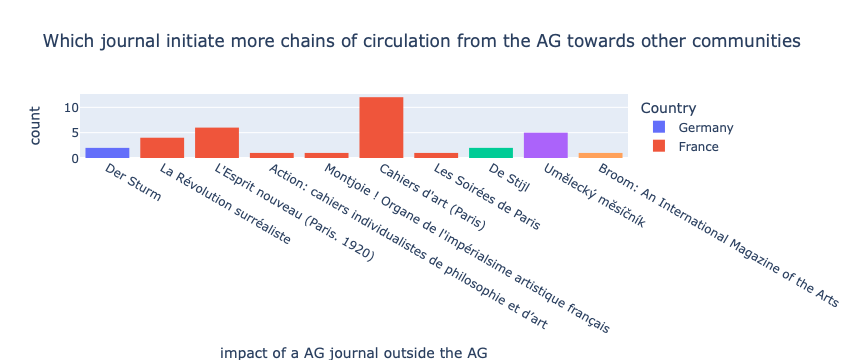

In [68]:
fig = px.histogram(p_ag,  x='issueLabel', color="Country",
            title="Which journal initiate more chains of circulation from the AG towards other communities",
                  labels={
                     "issueLabel": "impact of a AG journal outside the AG"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/external_human_all.png",  scale=3, width=2000) 
fig.write_html('viz/external_human_all.html', auto_open=True)

## Primitive images

### Distribution per year

In [25]:
image_vis = p_ag.drop_duplicates(subset=['image'])

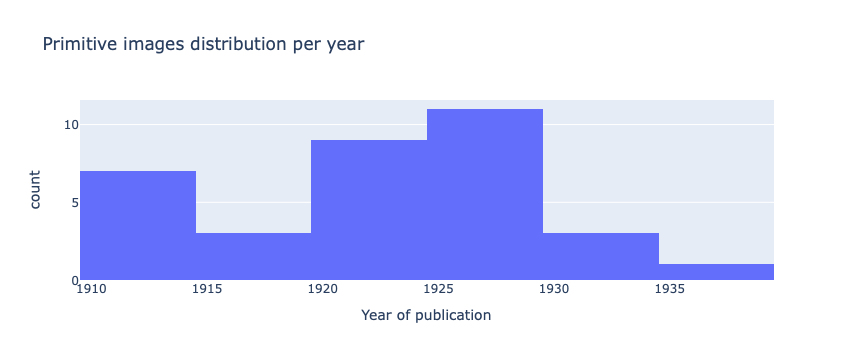

In [26]:
fig = px.histogram(image_vis, x='year',
            title="Primitive images distribution per year",
                  labels={
                     "year": "Year of publication"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
#fig.write_html('viz/image_per_year.html', auto_open=True)
fig.write_image("viz/image_per_year.png") 

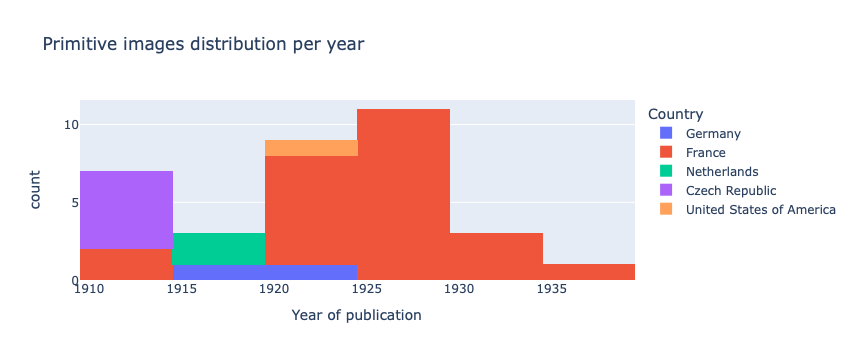

In [27]:
fig = px.histogram(image_vis, x='year', color="Country",
            title="Primitive images distribution per year",
                  labels={
                     "year": "Year of publication"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()
#fig.write_html('viz/image_per_year.html', auto_open=True)
fig.write_image("viz/image_per_year.png") 

### Which images

In [ ]:
def _src_from_data(data):
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    figures = []
    for image in images:
        if isinstance(image, bytes):
            src = _src_from_data(image)
            caption = ''
        else:
            src = image
            caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              {caption}
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

In [ ]:
image_vis.to_csv('csv/image_vis.csv', index=False)

In [ ]:
image_vis["image"].nunique()

In [ ]:
image_urls_ag = image_vis['image'].tolist()
gallery(image_urls_ag, row_height='200px')

## Analysing the chain

<font size="4">After adding an identifier with the primitive images we used for our analysis we merge them back to the original dataframe</font>

In [28]:
p_ag

,cluster,identifier,image,issueLabel,Country,labelType,cityLabel,begin,Datetime,year,count_journal
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Der Sturm,Germany,Avant-garde Journal,Berlin,1923-01-04T00:00:00,1923-01-04,1923,2
478,https://lod.unige.ch/vc/cluster/human/12,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k15...,La Révolution surréaliste,France,Avant-garde Journal,Paris,1925-07-15T00:00:00,1925-07-15,1925,4
240,https://lod.unige.ch/vc/cluster/human/13,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8093833;...,De Stijl,Netherlands,Avant-garde Journal,Delft,1919-02-01T00:00:00,1919-02-01,1919,2
311,https://lod.unige.ch/vc/cluster/human/14,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1921-01-01T00:00:00,1921-01-01,1921,6
192,https://lod.unige.ch/vc/cluster/human/203,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Umělecký mĕsíčník,Czech Republic,Avant-garde Journal,Prague,1912-01-08T00:00:00,1912-01-08,1912,5
421,https://lod.unige.ch/vc/cluster/human/208,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1922-01-01T00:00:00,1922-01-01,1922,6
41,https://lod.unige.ch/vc/cluster/human/210,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,Action: cahiers individualistes de philosophie...,France,Avant-garde Journal,Paris,1920-01-03T00:00:00,1920-01-03,1920,1
441,https://lod.unige.ch/vc/cluster/human/211,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k89...,Montjoie ! Organe de l'impérialsime artistique...,France,Avant-garde Journal,Paris,1914-01-01T00:00:00,1914-01-01,1914,1
884,https://lod.unige.ch/vc/cluster/human/217,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,Cahiers d'art (Paris),France,Avant-garde Journal,Paris,1937-01-01T00:00:00,1937-01-01,1937,11
790,https://lod.unige.ch/vc/cluster/human/218,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k10...,L'Esprit nouveau (Paris. 1920),France,Avant-garde Journal,Paris,1922-01-01T00:00:00,1922-01-01,1922,6


In [29]:
p_ag["primitive"] = "primitive"
p_ag.drop(['issueLabel','cityLabel','Country','begin','Datetime', 'count_journal','labelType','year'], axis=1, inplace=True)

In [30]:
products_dict = dict(zip(p_ag.image,p_ag.primitive))
df1['primitive'] = df1['image'].map(products_dict)

In [31]:
df1['primitive'] = df1['primitive'].fillna('no')

In [32]:
df1.to_csv('csv/df1.csv', index=False)

In [33]:
melted = df1.melt(id_vars=["cluster", "identifier", "image", "begin", "issueLabel", "labelType", "cityLabel","countryLabel", "Datetime", "year"], value_name ="start")
melted.sort_values(by=['identifier', 'begin'], inplace=True)

In [34]:
melted.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,Datetime,year,variable,start
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,1923-01-04T00:00:00,Der Sturm,Avant-garde Journal,Berlin,Germany,1923-01-04,1923,primitive,primitive
632,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1932-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1932-01-01,1932,primitive,no
631,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
633,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
636,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no


In [35]:
melted.to_csv('csv/melted_primitive.csv', index=False)

In [36]:
uniType = melted.groupby('identifier').start.nunique().eq(1)
c = uniType.index[uniType == False]
ag_cluster = melted[melted['identifier'].isin(c)]

In [37]:
ag_cluster.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,Datetime,year,variable,start
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,1923-01-04T00:00:00,Der Sturm,Avant-garde Journal,Berlin,Germany,1923-01-04,1923,primitive,primitive
632,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1932-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1932-01-01,1932,primitive,no
631,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
633,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
636,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no


In [38]:
ag_cluster.to_csv('csv/ag_cluster.csv', index=False)

## Fixing the differences in numbers

<font size="4">Due to the use of both human-made and machine-made clusters, some images may be the same across two clusters (and two chains of circulation). Therefore, while merging the data together, some images are assigned the status of primitive, without being so (they do not start a chain of circulation). We need to remove them before proceeding in our analysis</font>

In [39]:
clusters_after = ag_cluster["identifier"].tolist()
clusters_before = p_ag["identifier"].tolist()

In [40]:
list_delete = list(set(clusters_after) - set(clusters_before))
list_delete

['https://visualcontagions.unige.ch/explore/analysis/imageseries/223',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/296',
 'https://visualcontagions.unige.ch/explore/analysis/imageseries/209']

In [41]:
ag_cluster.loc[ag_cluster['identifier'].isin(list_delete), 'start'] = 'no'
ag_cluster.to_csv('csv/ag_cluster.csv', index=False)

In [42]:
ag_uni = ag_cluster.groupby('identifier').start.nunique().eq(1)
c = ag_uni.index[ag_uni == False]
ag_clean = ag_cluster[ag_cluster['identifier'].isin(c)]
ag_clean.to_csv('csv/ag_clean.csv', index=False)

In [43]:
ag_clean.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,Datetime,year,variable,start
638,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://bluemountain.princeton.edu/bluemtn/iii...,1923-01-04T00:00:00,Der Sturm,Avant-garde Journal,Berlin,Germany,1923-01-04,1923,primitive,primitive
632,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1932-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1932-01-01,1932,primitive,no
631,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
633,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no
636,https://lod.unige.ch/vc/cluster/human/10,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1933-01-01T00:00:00,"Abstraction, création, art non figuratif",Avant-garde Journal,Paris,France,1933-01-01,1933,primitive,no


#### Number of images per cluster

In [44]:
ag_clean['image_per_cluster'] = ag_clean.groupby(['identifier'])['cluster'].transform('count')
ag_clean.sort_values(by=['image_per_cluster'], ascending=False, inplace=True)
ag_clean.to_csv('csv/ag_clean.csv', index=False)

<font size="4">Which clusters has the longer chain of circulation?</font>

In [45]:
ag_clean2 = ag_clean.loc[ag_clean['image_per_cluster'].idxmax()]
print(ag_clean2["identifier"])

https://visualcontagions.unige.ch/explore/analysis/imageseries/13


## Visualise interconnections

<font size="4">What are the cluster interconnections? How do the chains of circulation traverse different communities? To discover it, we do a bit of data wrangling, and create two columnsm, one for AG journals which initiate chains of circulation, and another for all the different journals they touch</font>

In [46]:
ag_clean.sort_values(by=['identifier', 'start'], ascending=False, inplace=True)

In [47]:
ag_clean.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,Datetime,year,variable,start,image_per_cluster
77,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k15...,1925-07-15T00:00:00,La Révolution surréaliste,Avant-garde Journal,Paris,France,1925-07-15,1925,primitive,primitive,48
82,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k15...,1926-12-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,Paris,France,1926-12-01,1926,primitive,primitive,48
56,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1934-01-01T00:00:00,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,1934-01-01,1934,primitive,no,48
68,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1934-01-01T00:00:00,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,1934-01-01,1934,primitive,no,48
83,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k97...,1929-01-01T00:00:00,Cahiers d'art (Paris),Avant-garde Journal,Paris,France,1929-01-01,1929,primitive,no,48


In [48]:
ag_clean['notAG_issue'] = ag_clean['issueLabel']
ag_clean['notAG_type'] = ag_clean['labelType']
ag_clean['notAG_country'] = ag_clean['countryLabel']

In [49]:
ag_clean['issueLabel'] = ag_clean['issueLabel'][ag_clean['start']=='primitive']
ag_clean['labelType'] = ag_clean['labelType'][ag_clean['start']=='primitive']
ag_clean['countryLabel'] = ag_clean['countryLabel'][ag_clean['start']=='primitive']

In [50]:
ag_clean.ffill(inplace=True)

In [51]:
ag_clean = ag_clean[ag_clean['start']=='no']

In [52]:
ag_clean_only_ext = ag_clean.query("notAG_type != 'Avant-garde Journal'")

In [53]:
ag_clean_only_ext.head()

,cluster,identifier,image,begin,issueLabel,labelType,cityLabel,countryLabel,Datetime,year,variable,start,image_per_cluster,notAG_issue,notAG_type,notAG_country
85,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://iiif.archivelab.org/iiif/sim_arts-maga...,1926-01-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,New York City,France,1926-01-01,1926,primitive,no,48,Arts Magazine,Art Journal,United States of America
88,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://gallica.bnf.fr/iiif/ark:/12148/bpt6k42...,1934-01-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,Paris,France,1934-01-01,1934,primitive,no,48,L'Amour de l'art (1920),Modern Art Journal,France
87,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug8086029;...,1978-06-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,Buenos Aires,France,1978-06-01,1978,primitive,no,48,El Ornitorrinco. Revista de literatura,Literature,Argentina
55,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug27805966...,1949-07-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,Amsterdam,France,1949-07-01,1949,primitive,no,48,Ariadne,Illustrated Magazine,Netherlands
66,https://lod.unige.ch/vc/cluster/human/58,https://visualcontagions.unige.ch/explore/anal...,https://iiif.unige.ch/iiif/2/fedora_ug27817205...,1947-01-01T00:00:00,La Révolution surréaliste,Avant-garde Journal,New York City,France,1947-01-01,1947,primitive,no,48,Art Directors Annual of Advertising Arts,Illustrated Magazine,United States of America


In [54]:
ag_clean_only_ext.sort_values(by=['identifier'], ascending=False, inplace=True)
ag_clean_only_ext.to_csv('csv/ag_clean_only_ext.csv', index=False)

In [55]:
fig = px.sunburst(ag_clean_only_ext, path=['issueLabel', 'notAG_type', 'notAG_issue'], 
                  )
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig.write_html('viz/community_sunburst.html', auto_open=True)

In [56]:
fig = px.sunburst(ag_clean_only_ext, path=['labelType', 'notAG_type', 'notAG_issue'], 
                  )
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig.write_html('viz/community_sunburst.html', auto_open=True)

the number in the diagram reflect the total number of images that have been impacted by a chain of circulation originating in that country. Ex: if a cluster of 10 images has a primitive image from Germany and create a circulation of 8 image (outside the AG community), it counts 8 for that country.

In [57]:
fig1 = px.sunburst(ag_clean_only_ext, path=['countryLabel', 'notAG_country']
                        )
fig1.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig1.write_html('viz/country_sunburst.html', auto_open=True)

# other possibilities

## To cut

In [ ]:
primitive = ag_clean.query("start == 'primitive'")
not_primitive = ag_clean.query("start == 'no'")
not_primitive = not_primitive.query("labelType != 'Avant-garde Journal'")

In [ ]:
not_primitive['type_not_primitive_count'] = not_primitive.groupby(['labelType'])['cluster'].transform('count')
not_primitive['country_not_primitive_count'] = not_primitive.groupby(['countryLabel'])['cluster'].transform('count')

In [ ]:
not_primitive

In [ ]:
not_primitive.rename({'issueLabel': 'issue_notAG', 'countryLabel': 'country_notAG','begin':'begin_notAG', 'labelType':'labelType_notAG'}, axis=1, inplace=True)


In [ ]:
not_primitive.drop(['cluster','cityLabel','Datetime', 'variable','year'], axis=1, inplace=True)
not_primitive

In [ ]:
primitive['country_primitive_count'] = primitive.groupby(['countryLabel'])['cluster'].transform('count')
primitive.drop(['cluster','cityLabel','Datetime', 'variable','year'], axis=1, inplace=True)

In [ ]:
primitive

In [ ]:
result = pd.concat([primitive, not_primitive])

In [ ]:
result

In [ ]:
result.sort_values(by=['identifier', 'issueLabel'], ascending=False, inplace=True)
result.to_csv('csv/result.csv', index=False)

In [ ]:
rs1 = result.ffill(inplace=True)

In [ ]:
fig = px.sunburst(result, path=['issueLabel', 'labelType_notAG', 'issue_notAG'], 
                  )
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig.write_html('viz/community_sunburst.html', auto_open=True)

## Return to the database

<font size="4">To do so, the easiest way is to use our data to query SPARQL and model the results</font>

In [ ]:
query = p_ag.drop_duplicates(subset=['cluster'])

In [ ]:
query['cluster'] = '<' + query['cluster'].astype(str) + '>'
guigg = query["cluster"].tolist()
separator = ' '
new_guigg = separator.join(guigg)

In [ ]:
qsun = """
    PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
    PREFIX frbroo: <http://iflastandards.info/ns/fr/frbr/frbroo/>
    PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX aat: <http://vocab.getty.edu/aat/>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    
    SELECT DISTINCT ?identifier ?AGJournal ?countryAG ?notAGJournal ?notAGcountry ?JournalTypeLabel WHERE {

	VALUES ?cluster { %s } .
    VALUES ?avantgarde { <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> } .
    
		?cluster crm:P148_has_component ?image ;
           	crm:P1_is_identified_by ?identifier .
		?image crm:P128i_is_carried_by ?issue . 
		?issue crm:P2_has_type <https://lod.unige.ch/vc/type/988EE2E2-172C-3104-8DAA-B4D629E814AE> ;
               crm:P108i_was_produced_by ?production ;
				rdfs:label ?AGJournal .
        
        
        ?production crm:P7_took_place_at ?country .
                     
        ?country crm:P2_has_type aat:300387506 ;
                rdfs:label ?countryAG .
	
		?cluster crm:P148_has_component ?image1 . 
		?image1 crm:P128i_is_carried_by ?issue1 . 
		?issue1 crm:P108i_was_produced_by ?production1 ;
                crm:P2_has_type ?type ;
				rdfs:label ?notAGJournal .
		?type rdfs:label ?JournalTypeLabel .
         
        ?production1 crm:P7_took_place_at ?country1 .
        
        ?country1 crm:P2_has_type aat:300387506 ;
                rdfs:label ?notAGcountry .

		FILTER (contains(str(?type), "https://lod.unige.ch/vc/type/"))
		FILTER (?type != ?avantgarde)

}
""" % new_guigg

In [ ]:
df_compare = sparql_dataframe.get(endpoint, qsun)

once obtained the result, we can count the number of different communities associated with AD

In [ ]:
df_compare.head()

In [ ]:
df2 = df_compare.groupby(['countryAG','image']).identifier.agg('count')

In [ ]:
df2.info()

In [ ]:
df_compare = df_compare.groupby(["countryAG", "identifier"]).agg(count_col=pd.NamedAgg(column="countryAG", aggfunc="count")

In [ ]:
df2 = df_compare.groupby(['countryAG','AGJournal'])["identifier"].transform("count")

In [ ]:
df_compare['count_community'] = df_compare.groupby([ 'JournalTypeLabel'])['notAGJournal'].transform('count')
df_compare['count_notAG_country'] = df_compare.groupby([ 'notAGcountry'])['identifier'].transform('count')
df_compare['count_countryAG'] = df_compare.groupby([ 'countryAG'])['identifier'].transform('count')

In [ ]:
df_compare.to_csv('csv/df_compare.csv', index=False)

In [ ]:
fig = px.sunburst(df_compare, path=['AGJournal', 'JournalTypeLabel', 'notAGJournal'], 
                  )
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig.write_html('viz/community_sunburst.html', auto_open=True)

<font size="4">As we computed the countries, we can check them out too</font>

In [ ]:
df_compare['notAGcountry'].info

In [ ]:
fig1 = px.sunburst(df_compare, path=['countryAG', 'notAGcountry']
                        )
fig1.update_layout(uniformtext=dict(minsize=10, mode='hide'))
#fig.show()
fig1.write_html('viz/country_sunburst.html', auto_open=True)

## to cut: Filter by Time (post 1960)

In [ ]:
import plotly.express as px
import pandas as pd
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
           "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
           "South", "South", "South", "South", "South"]
sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
print(df)
fig = px.sunburst(df, path=['regions', 'sectors', 'vendors'], values='sales')
fig.show()

In [ ]:

post1960 = (df1['year'] > 1960) 
df_post1960 = df1.loc[post1960]

df_post1960["cluster"].nunique()

df_post1960.drop_duplicates(subset=['identifier'], inplace=True)
df_post1960.to_csv('csv/df_post1960.csv', index=False)